In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import time

In [7]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from pmdarima.arima.utils import ndiffs

In [9]:
import io
data = pd.read_excel('Maindata.xlsx')
data.head()

,Zone,Dealer Code,Dealer Name,Transaction No.,Description,Status,Posting Date,IRT,CATEGORY,IRTSTATUS,MPT,MPTSTATUS,Changed On,TRANSACTIONTYPE,Created By,Reported By,Object GUID
0,NaN,NaN,NaN,2000095635,Medium,Open,2022-05-06,0,Sales,NaN,0,NaN,2022-05-06,MG_MOTORS_Incident,ANANDSHARMA,NaN,0
1,NaN,NaN,NaN,1000003085,Very High,Open,2022-05-06,0,NaN,NaN,0,NaN,2022-05-06,MG Parts Support,S309PRM0001,NaN,0
2,NaN,NaN,NaN,1000003086,Medium,Open,2022-05-06,0,NaN,NaN,0,NaN,2022-05-06,MG Parts Support,WW14PRM0001,NaN,0
3,NaN,NaN,NaN,2000095644,Very High,Open,2022-05-06,0,After Sales,NaN,0,NaN,2022-05-06,MG_MOTORS_Incident,DW02HSR0001,NaN,0
4,NaN,NaN,NaN,2000095646,High,Open,2022-05-06,0,Sales,NaN,0,NaN,2022-05-06,MG_MOTORS_Incident,DE04CRE0001,NaN,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97125 entries, 0 to 97124
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Zone             95080 non-null  object        
 1   Dealer Code      95080 non-null  object        
 2   Dealer Name      95056 non-null  object        
 3   Transaction No.  97125 non-null  int64         
 4   Description      97118 non-null  object        
 5   Status           97125 non-null  object        
 6   Posting Date     97125 non-null  datetime64[ns]
 7   IRT              97125 non-null  int64         
 8   CATEGORY         92095 non-null  object        
 9   IRTSTATUS        3790 non-null   object        
 10  MPT              97125 non-null  int64         
 11  MPTSTATUS        10610 non-null  object        
 12  Changed On       97125 non-null  datetime64[ns]
 13  TRANSACTIONTYPE  97124 non-null  object        
 14  Created By       97125 non-null  objec

In [11]:
data.isnull().sum()

Zone                2045
Dealer Code         2045
Dealer Name         2069
Transaction No.        0
Description            7
Status                 0
Posting Date           0
IRT                    0
CATEGORY            5030
IRTSTATUS          93335
MPT                    0
MPTSTATUS          86515
Changed On             0
TRANSACTIONTYPE        1
Created By             0
Reported By         6192
Object GUID            0
dtype: int64

In [12]:
data.drop(columns=["IRTSTATUS","MPTSTATUS","Object GUID"],axis=1,inplace=True)

In [13]:
data.columns=["zone","dealer_code","dealer_name","trans_no.","description","status","posting_date","IRT","category","MPT","changed_on","transaction_type","created_by","reported_by"]
data.head()

,zone,dealer_code,dealer_name,trans_no.,description,status,posting_date,IRT,category,MPT,changed_on,transaction_type,created_by,reported_by
0,NaN,NaN,NaN,2000095635,Medium,Open,2022-05-06,0,Sales,0,2022-05-06,MG_MOTORS_Incident,ANANDSHARMA,NaN
1,NaN,NaN,NaN,1000003085,Very High,Open,2022-05-06,0,NaN,0,2022-05-06,MG Parts Support,S309PRM0001,NaN
2,NaN,NaN,NaN,1000003086,Medium,Open,2022-05-06,0,NaN,0,2022-05-06,MG Parts Support,WW14PRM0001,NaN
3,NaN,NaN,NaN,2000095644,Very High,Open,2022-05-06,0,After Sales,0,2022-05-06,MG_MOTORS_Incident,DW02HSR0001,NaN
4,NaN,NaN,NaN,2000095646,High,Open,2022-05-06,0,Sales,0,2022-05-06,MG_MOTORS_Incident,DE04CRE0001,NaN


In [14]:
dt=data.groupby("posting_date").agg({"description":"count"}).fillna(0).astype(int)
dt.head()

,description
posting_date,
2020-02-27,1
2020-02-28,14
2020-02-29,4
2020-03-02,1
2020-03-03,2


In [15]:
idx = pd.date_range('2020-02-27','2022-05-06')
dt.index = pd.DatetimeIndex(dt.index)
dt = dt.reindex(idx, fill_value=0)
print(dt)

            description
2020-02-27            1
2020-02-28           14
2020-02-29            4
2020-03-01            0
2020-03-02            1
...                 ...
2022-05-02           83
2022-05-03           74
2022-05-04          116
2022-05-05          125
2022-05-06           95

[800 rows x 1 columns]


In [16]:
dt.reset_index(inplace=True)
dt.columns=["posting_date","description"]
dt.head(10)

,posting_date,description
0,2020-02-27,1
1,2020-02-28,14
2,2020-02-29,4
3,2020-03-01,0
4,2020-03-02,1
5,2020-03-03,2
6,2020-03-04,1
7,2020-03-05,2
8,2020-03-06,4
9,2020-03-07,0


In [17]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   posting_date  800 non-null    datetime64[ns]
 1   description   800 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.6 KB


In [18]:
dt.description.max()

321

In [19]:
dt.description.min()

0

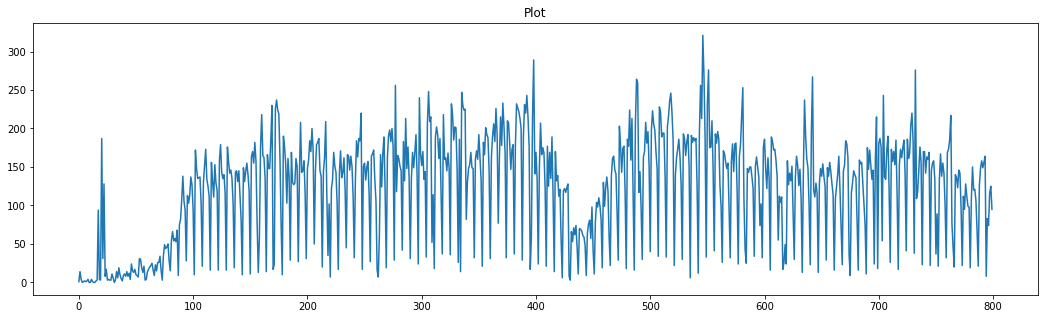

In [20]:
plt.figure(figsize=(18,5))
plt.plot(dt["description"])
plt.title("Plot")
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller
result= adfuller(dt["description"])
print("ADF Statistic is: ",result[0])
print("p-value is: ",result[1])

ADF Statistic is:  -2.4891028354323024
p-value is:  0.11814828625975088


In [22]:
result

(-2.4891028354323024,
 0.11814828625975088,
 21,
 778,
 {'1%': -3.438783171038672,
  '10%': -2.568752018688748,
  '5%': -2.865262118650577},
 7788.404724729095)

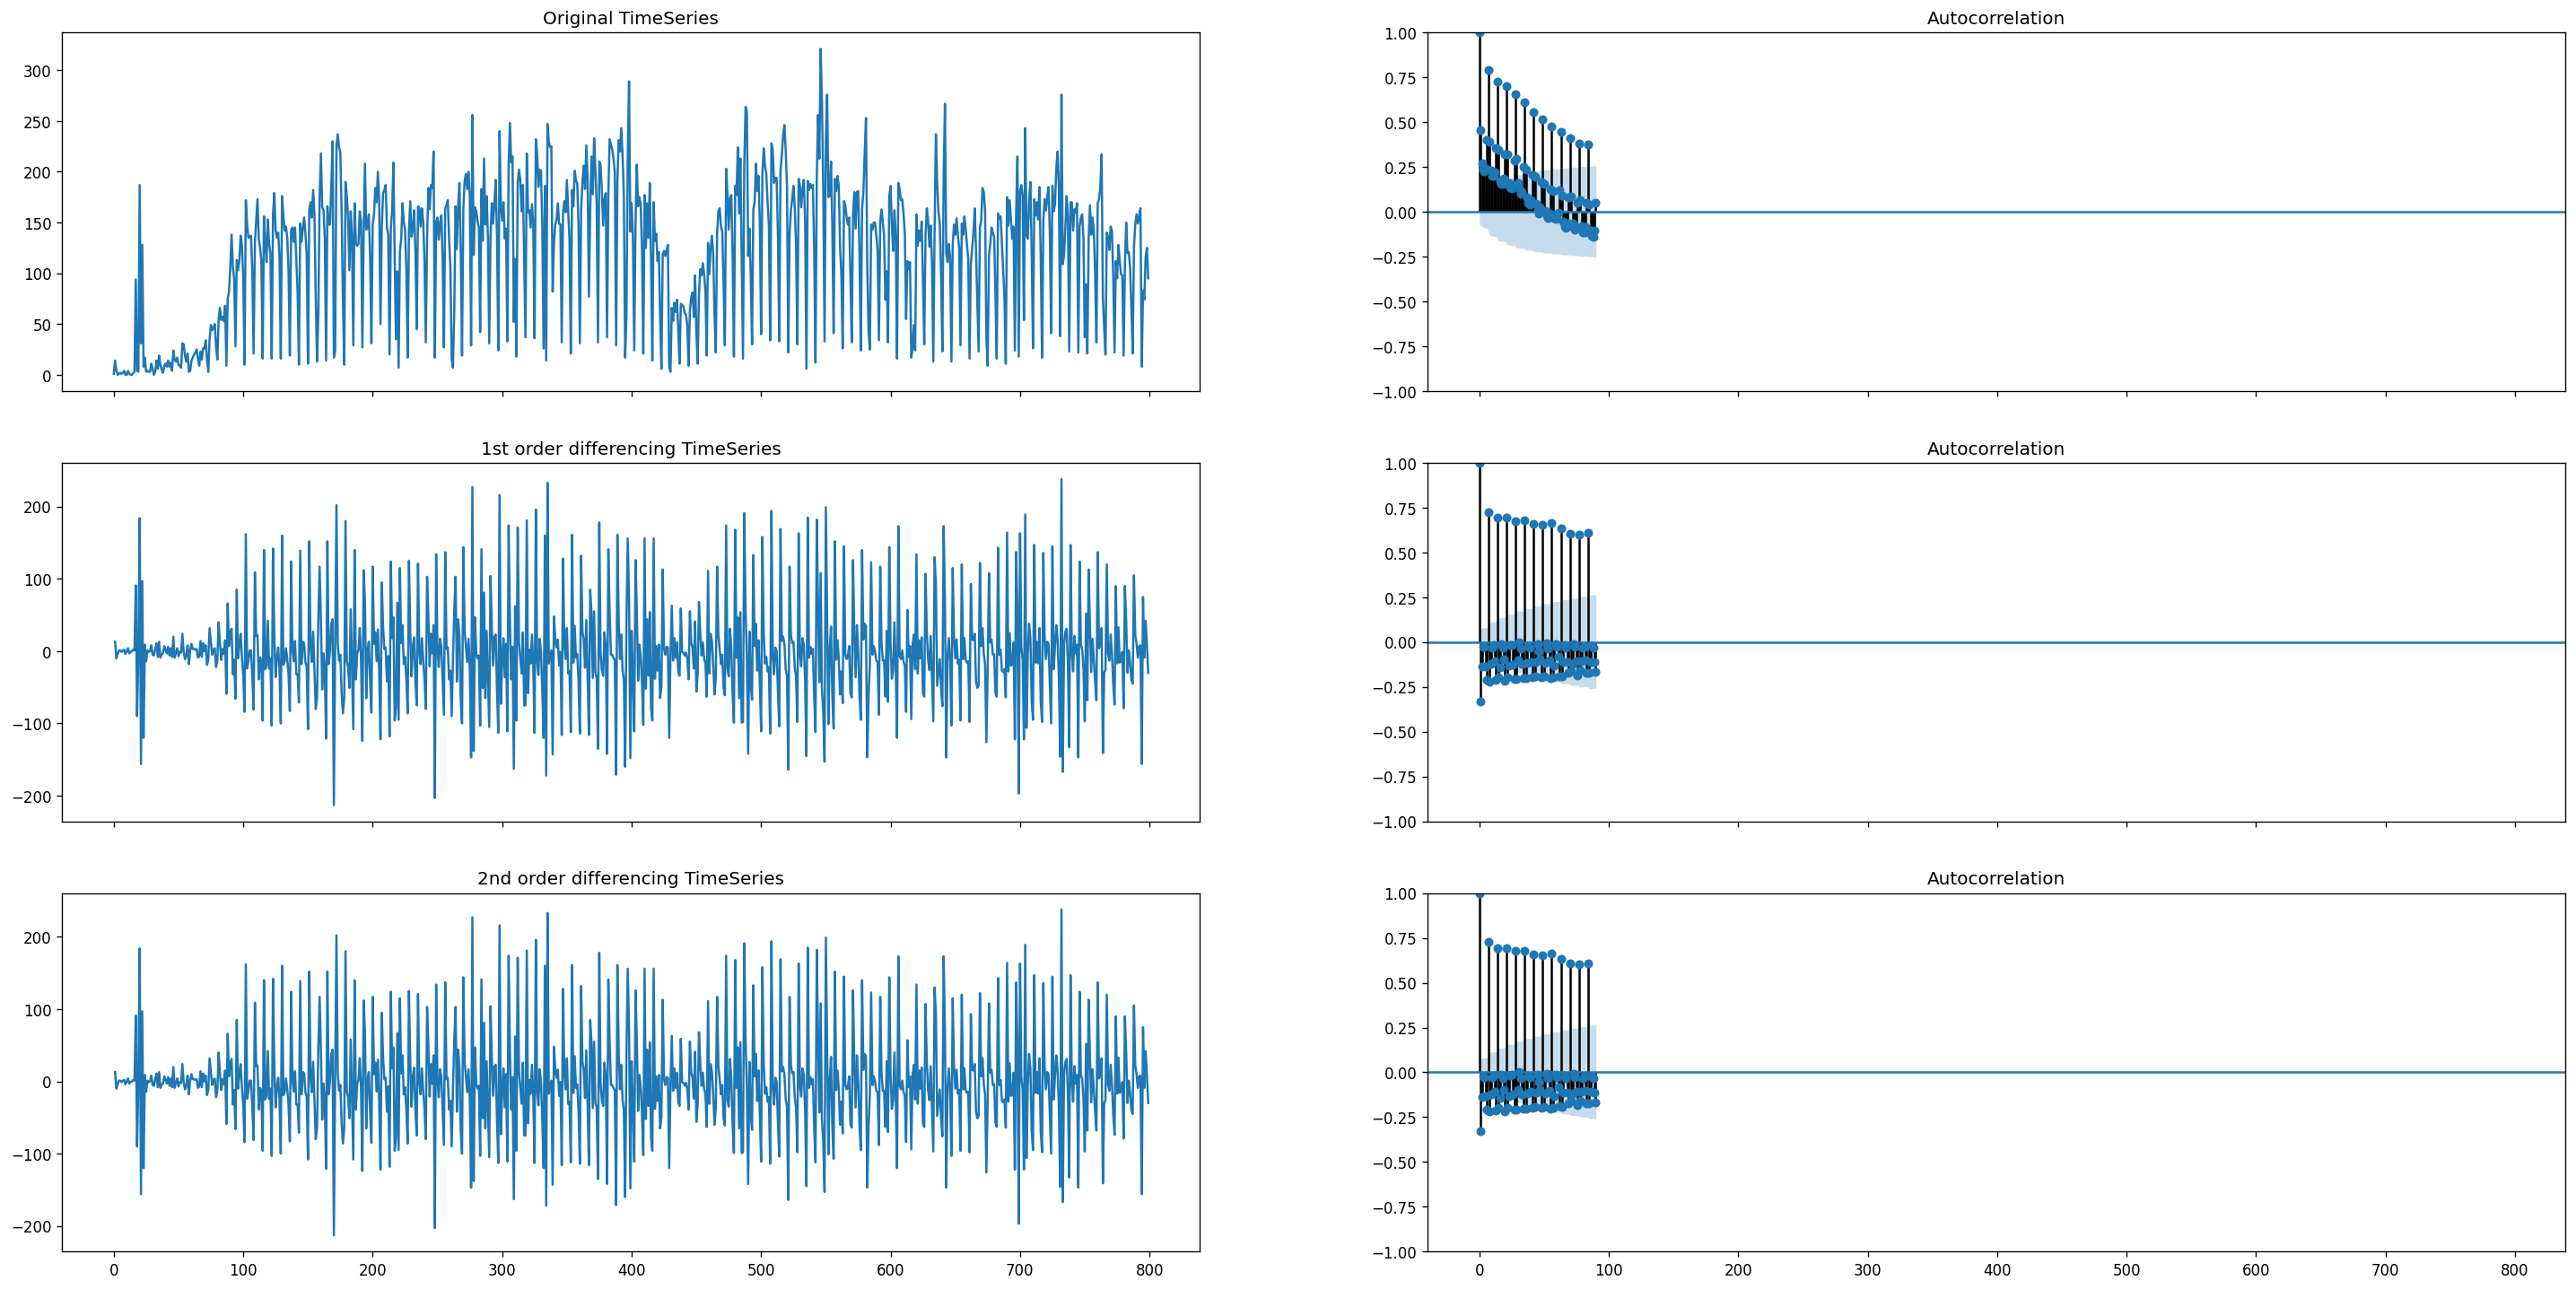

In [23]:
#figure & axis
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(30,15),'figure.dpi':120})
fig,axes=plt.subplots(3,2,sharex=True)

#original timeseries plot
axes[0,0].plot(dt["description"])
axes[0,0].set_title("Original TimeSeries")
plot_acf(dt["description"],lags=90,ax=axes[0,1])

#1st order differencing
axes[1,0].plot(dt["description"].diff())
axes[1,0].set_title("1st order differencing TimeSeries")
plot_acf(dt["description"].diff().dropna(),lags=90,ax=axes[1,1])


#2d order differencing
axes[2,0].plot(dt["description"].diff())
axes[2,0].set_title("2nd order differencing TimeSeries")
plot_acf(dt["description"].diff().dropna(),lags=90,ax=axes[2,1])

plt.show()

In [24]:
y = dt["description"]
ndiffs(y,test = "kpss")

1

In [25]:
ndiffs(y,test="adf")

1

In [26]:
ndiffs(y,test="pp")

0

In [27]:
#Determine model Parameters
from pmdarima import auto_arima

In [28]:
model = auto_arima(dt["description"], start_p=1, start_q=1,
                   test='adf',            #use adf test to find optimal d
                   max_p=5, max_q=5,      #maximum p and q
                   m=1,                   #frequency of series
                   d=None,                
                   seasonal=False,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8729.805, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9098.465, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9008.284, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8748.741, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9096.468, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8713.725, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8946.842, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8697.579, Time=0.91 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8912.858, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8660.212, Time=1.31 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=8882.792, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8561.505, Time=1.61 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=8779.620, Time=0.29 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8416.657, Time=3.09 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept

In [29]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  800
Model:               SARIMAX(4, 1, 5)   Log Likelihood               -4190.155
Date:                Tue, 19 Jul 2022   AIC                           8400.309
Time:                        20:17:54   BIC                           8447.143
Sample:                             0   HQIC                          8418.302
                                - 800                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8056      0.015     55.296      0.000       0.777       0.834
ar.L2         -1.4366      0.020    -73.523      0.000      -1.475      -1.398
ar.L3          0.7902      0.019     42.021      0.0

In [30]:
#p=4, d=1, q=5   
#Split data
#perform split keeping time series intact
train = dt.iloc[:680]
test = dt.iloc[680:]
train.head()

,posting_date,description
0,2020-02-27,1
1,2020-02-28,14
2,2020-02-29,4
3,2020-03-01,0
4,2020-03-02,1


In [31]:
train.shape

(680, 2)

In [32]:
model = auto_arima(train["description"], start_p=1, start_q=1,
                   test='adf',            
                   max_p=5, max_q=5,     
                   m=1,                   
                   d=None,                
                   seasonal=False,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7418.161, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7716.096, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7648.900, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7439.376, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7714.102, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7402.911, Time=0.52 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7599.224, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7388.204, Time=0.78 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7570.880, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7354.262, Time=1.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=7543.491, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=7265.884, Time=1.45 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=7446.552, Time=0.75 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=7142.668, Time=2.79 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept

In [33]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  680
Model:               SARIMAX(5, 1, 4)   Log Likelihood               -3553.117
Date:                Tue, 19 Jul 2022   AIC                           7126.234
Time:                        20:18:35   BIC                           7171.440
Sample:                             0   HQIC                          7143.733
                                - 680                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1402      0.051      2.755      0.006       0.040       0.240
ar.L2         -0.9025      0.042    -21.573      0.000      -0.984      -0.820
ar.L3         -0.1600      0.070     -2.295      0.0

In [34]:
model.fit(train["description"])

ARIMA(order=(5, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [35]:
test.shape

(120, 2)

In [36]:
forecast, confidence_interval = model.predict(n_periods=120, return_conf_int=True, alpha=0.05)

In [37]:
test["forecast"] = forecast
test["lower_range"] = confidence_interval[:,0]
test["upper_range"] = confidence_interval[:,1]
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,posting_date,description,forecast,lower_range,upper_range
680,2022-01-07,136,127.656305,16.900956,238.411655
681,2022-01-08,79,44.152027,-72.118983,160.423037
682,2022-01-09,16,22.345503,-111.155400,155.846406
683,2022-01-10,159,98.752914,-40.189752,237.695581
684,2022-01-11,154,151.437308,1.312003,301.562613
...,...,...,...,...,...
795,2022-05-02,83,89.830722,-514.322825,693.984269
796,2022-05-03,74,134.903898,-471.293697,741.101493
797,2022-05-04,116,136.824149,-471.269205,744.917502
798,2022-05-05,125,137.886977,-472.851615,748.625570


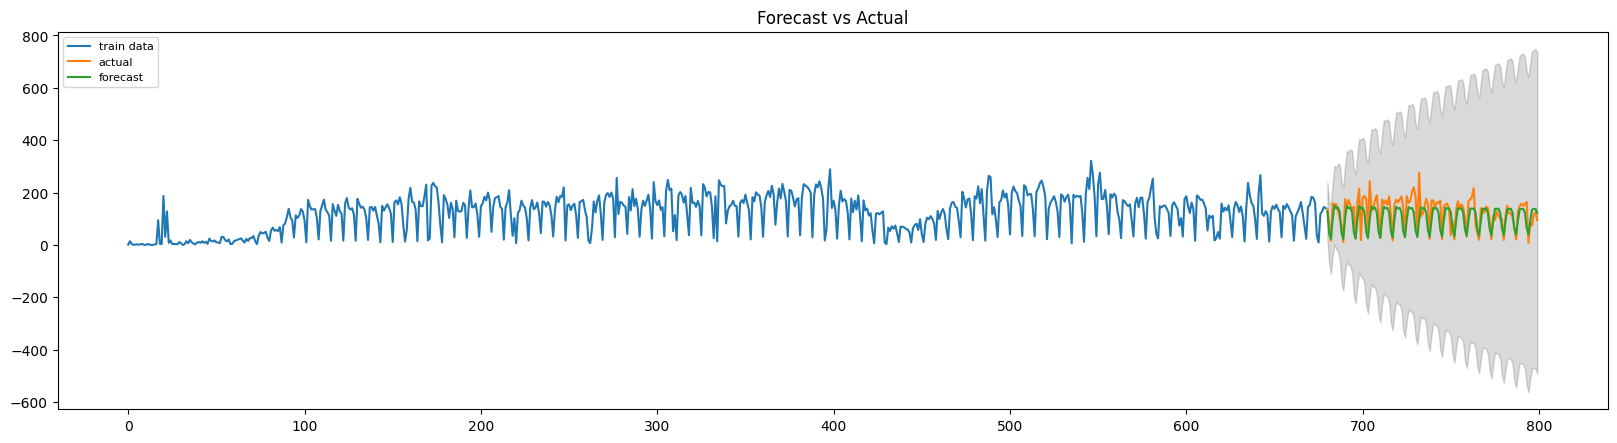

In [38]:
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train["description"], label='train data')
plt.plot(test["description"], label='actual')
plt.plot(test["forecast"], label='forecast')
plt.fill_between(test.index, test["lower_range"], test["upper_range"], color='k', alpha=0.15)
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [39]:
#MAPE = Mean Absolute Percentage Error
from pmdarima.metrics import smape

In [40]:
mpe = smape(test["description"], test["forecast"])
print("MPE is", mpe)

MPE is 35.40874754981367


In [41]:
#model is 65% accurate